# Unsupervised Learning

Unsupervised learning is where you only have input data $(X)$ and no corresponding output variables.

The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data.

## Clustering

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

Let’s understand this with an example. Suppose, you are the head of a rental store and wish to understand preferences of your costumers to scale up your business. Is it possible for you to look at details of each costumer and devise a unique business strategy for each one of them? Definitely not. But, what you can do is to cluster all of your costumers into say 10 groups based on their purchasing habits and use a separate strategy for costumers in each of these 10 groups. And this is what we call clustering.

In [1]:
%matplotlib inline
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]

from sklearn import cluster, datasets, mixture

In [2]:
# Generate the datasets

n_samples = 1500

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

data = [blobs, noisy_moons, noisy_circles]
titles = ['Blobs', 'Moons', 'Circles']

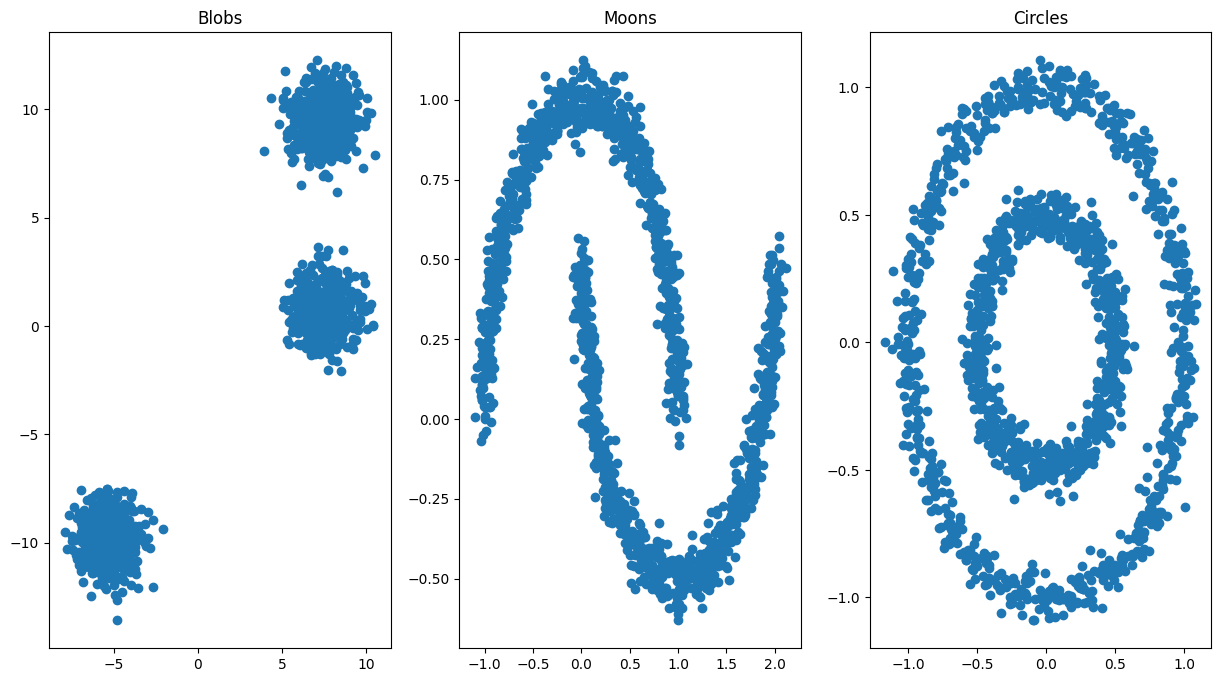

In [3]:
fig, axs = plt.subplots(1,3)

for i in range(len(data)):
  x = data[i][0][:,0]
  y = data[i][0][:,1]

  axs[i].plot(x, y, 'o')
  axs[i].set_title(titles[i])
plt.show()

## K-Means



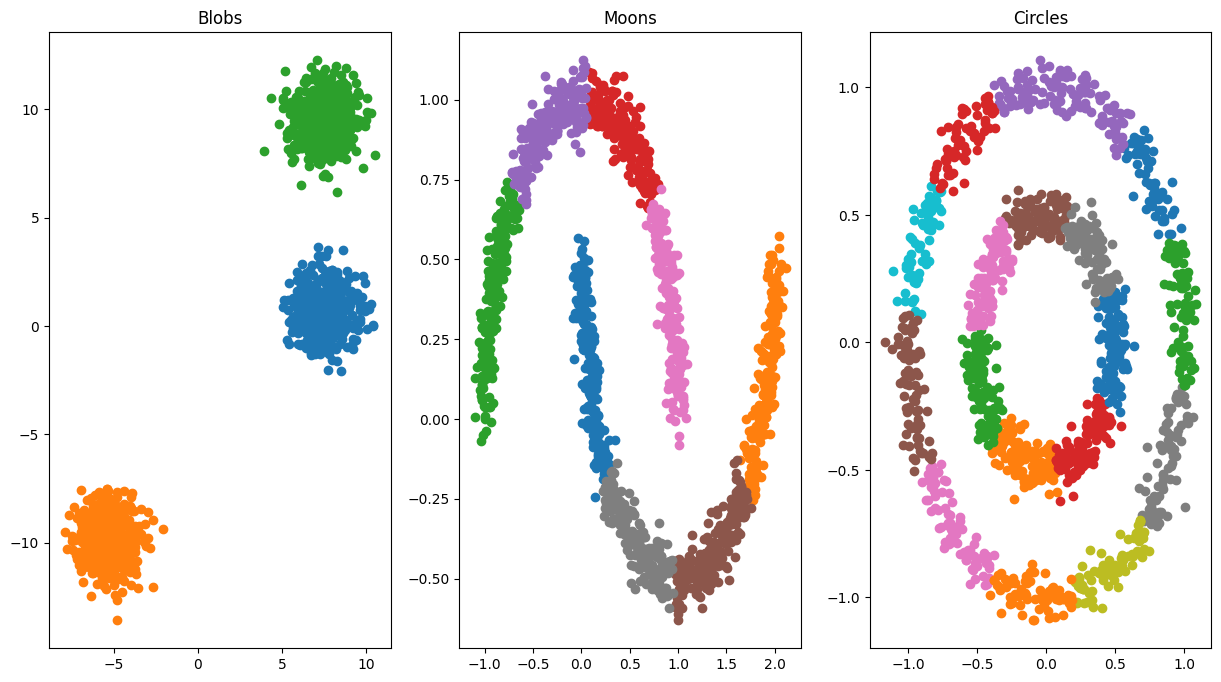

In [4]:
fig, axs = plt.subplots(1,3)

k = [3, 8, 18]

for i in range(len(data)):
  x = data[i][0][:,0]
  y = data[i][0][:,1]
  X = data[i][0]

  clustering = cluster.KMeans(n_clusters=k[i], n_init='auto', random_state=42).fit(X)

  labels = clustering.labels_
  for l in range(max(labels)+1):
    xl = x[labels == l]
    yl = y[labels == l]

    axs[i].plot(xl, yl, 'o')
    axs[i].set_title(titles[i])
plt.show()

## Gaussian Mixture

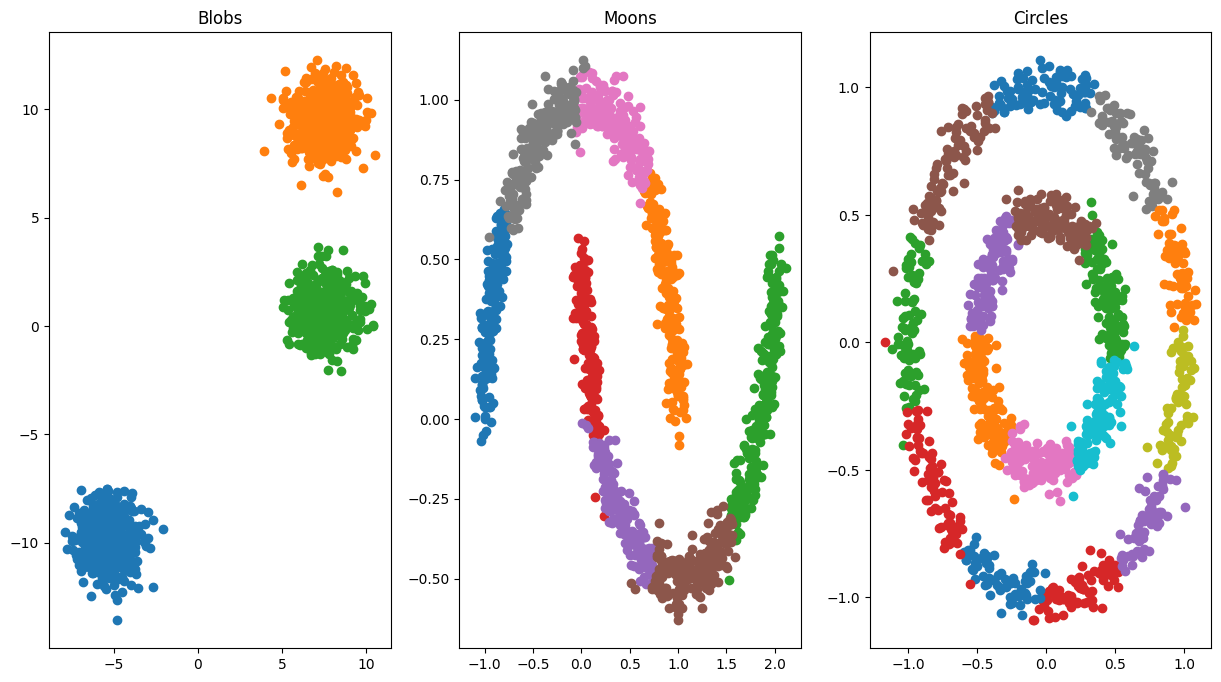

In [5]:
fig, axs = plt.subplots(1,3)

k = [3, 8, 16]

for i in range(len(data)):
  x = data[i][0][:,0]
  y = data[i][0][:,1]
  X = data[i][0]

  clustering = mixture.GaussianMixture(n_components=k[i], random_state=0).fit(X)

  labels = clustering.predict(X)
  for l in range(max(labels)+1):
    xl = x[labels == l]
    yl = y[labels == l]

    axs[i].plot(xl, yl, 'o')
    axs[i].set_title(titles[i])
plt.show()

## DBSCAN

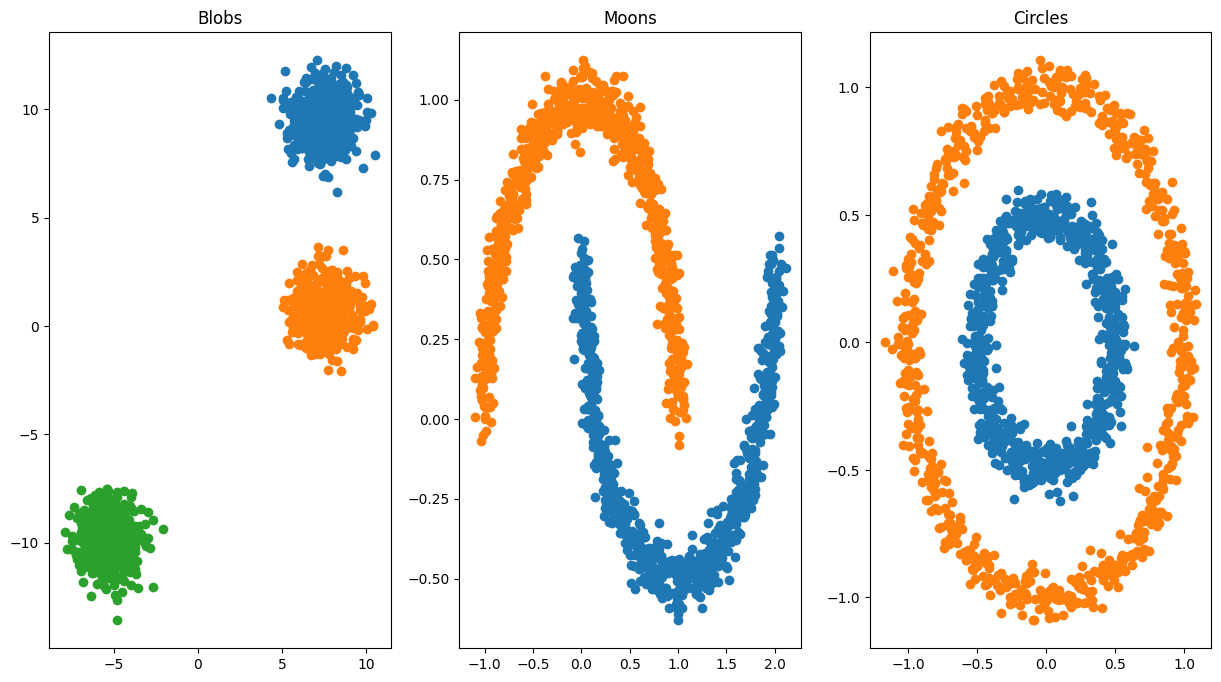

In [6]:
fig, axs = plt.subplots(1,3)

eps = [1, .1, .1]

for i in range(len(data)):
  x = data[i][0][:,0]
  y = data[i][0][:,1]
  X = data[i][0]

  clustering = cluster.DBSCAN(eps=eps[i], min_samples=2).fit(X)

  labels = clustering.labels_
  for l in range(max(labels)+1):
    xl = x[labels == l]
    yl = y[labels == l]

    axs[i].plot(xl, yl, 'o')
    axs[i].set_title(titles[i])
plt.show()

## Hierarchical Clustering

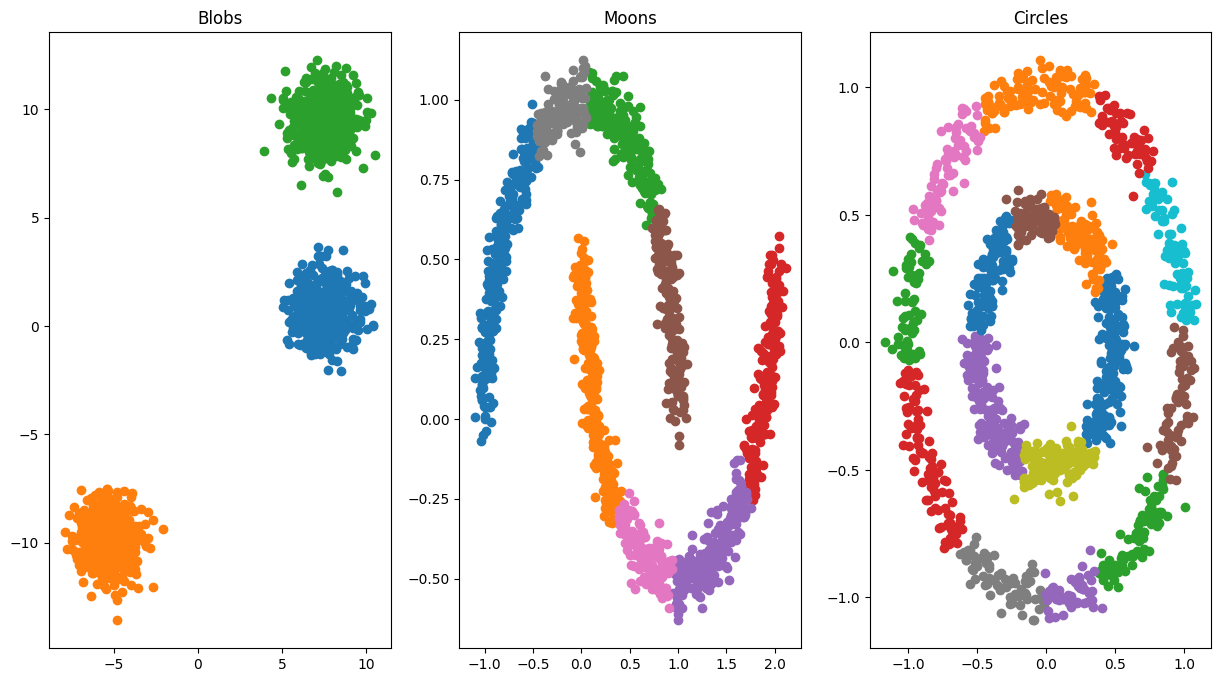

In [7]:
fig, axs = plt.subplots(1,3)

k = [3, 8, 16]

for i in range(len(data)):
  x = data[i][0][:,0]
  y = data[i][0][:,1]
  X = data[i][0]

  clustering = cluster.AgglomerativeClustering(n_clusters=k[i]).fit(X)

  labels = clustering.labels_
  for l in range(max(labels)+1):
    xl = x[labels == l]
    yl = y[labels == l]

    axs[i].plot(xl, yl, 'o')
    axs[i].set_title(titles[i])
plt.show()

## Blind Signal Separation

Blind Source Separation is the separation of a set of source signals from a set of mixed signals.

My favorite example of this problem is known as the **cocktail party** problem where a number of people are talking simultaneously and we want to separate each persons speech so we can listen to it separately. Now the caveat with this type of approach is that we need as many mixtures as we have source signals or in terms of the cocktail party problem we need as many microphones as people talking in the room.

Let’s get started. This example is going to be in Python and the first thing we are going to need to do is load some audio files. To make things a bit easier further on in this example I’m going to wrap the basic scipy wav file reader and add some additional functionality. First I added a case to handle converting stereo wav files back into mono wav files and secondly this loader takes a desired sample rate and resamples the input to match. This is important because when we mix the two audio signals they need to have the same sample rate.

In [8]:
import requests
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image
from io import BytesIO
from IPython.display import display

JPEG
(512, 512)
L


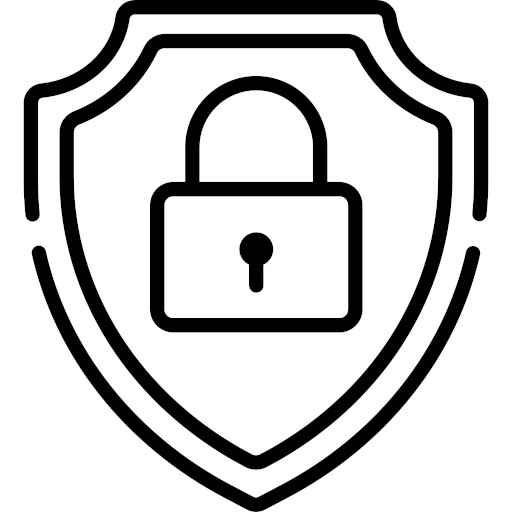

In [9]:
url = 'https://github.com/detiuaveiro/aas/blob/main/slides/figures/shield.jpeg?raw=true'
response = requests.get(url)
img01 = Image.open(BytesIO(response.content))

print(img01.format)
print(img01.size)
print(img01.mode)

#imshow(np.asarray(img01))
display(img01)

JPEG
(512, 512)
L


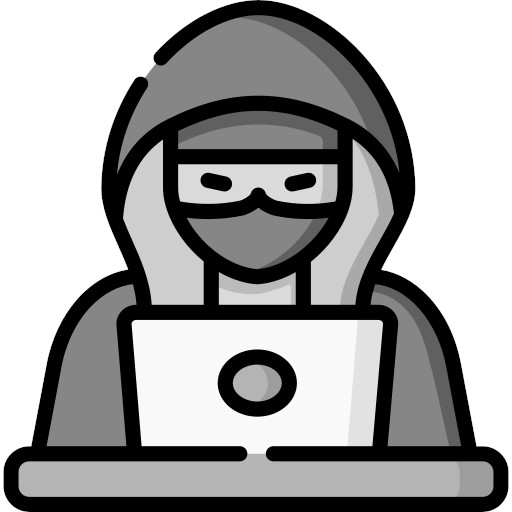

In [10]:
url = 'https://github.com/detiuaveiro/aas/blob/main/slides/figures/hacker.jpeg?raw=true'
response = requests.get(url)
img02 = Image.open(BytesIO(response.content))

print(img02.format)
print(img02.size)
print(img02.mode)

#imshow(np.asarray(img02))
display(img02)

JPEG
(512, 512)
L


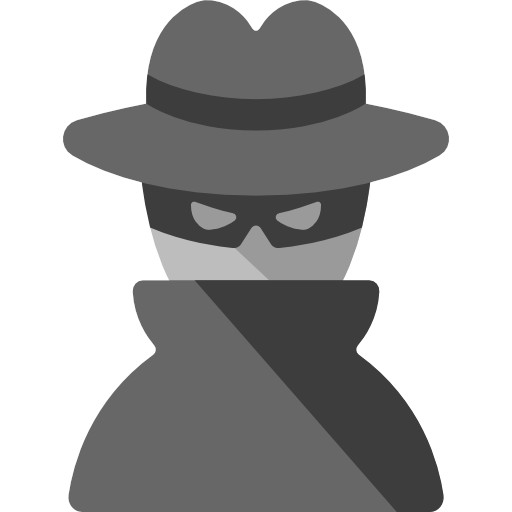

In [11]:
url = 'https://github.com/detiuaveiro/aas/blob/main/slides/figures/criminal.jpeg?raw=true'
response = requests.get(url)
img03 = Image.open(BytesIO(response.content))

print(img03.format)
print(img03.size)
print(img03.mode)

#imshow(np.asarray(img03))
display(img03)

(512, 512) (512, 512) (512, 512)
[510. 510. 510. ... 510. 510. 510.]
(512, 512)


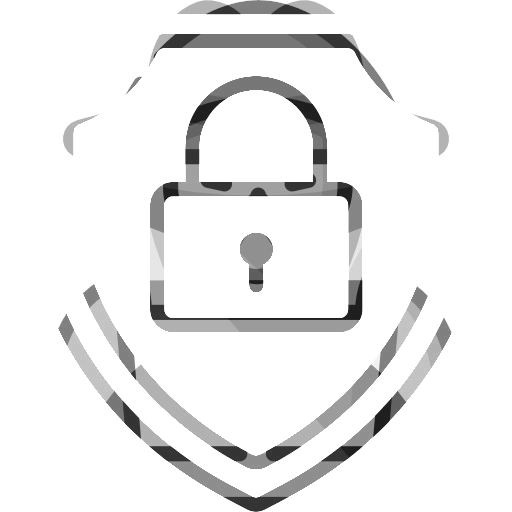

[510. 510. 510. ... 510. 510. 510.]
(512, 512)


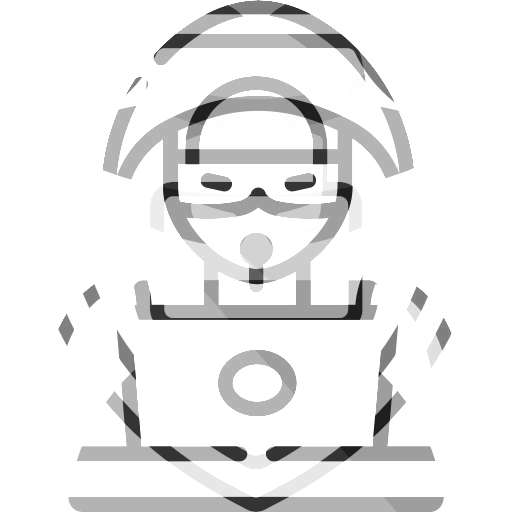

[510. 510. 510. ... 510. 510. 510.]
(512, 512)


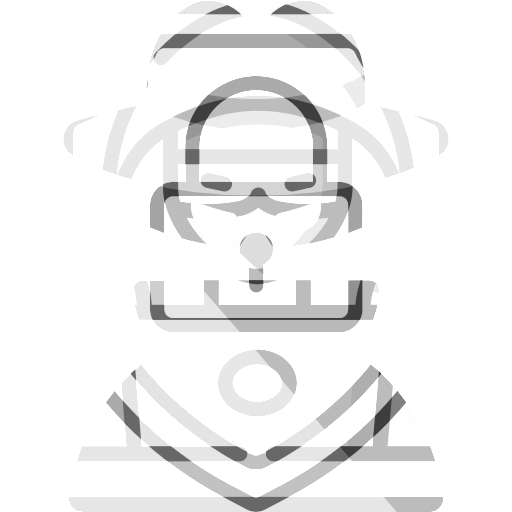

In [12]:
data01 = np.asarray(img01)
data02 = np.asarray(img02)
data03 = np.asarray(img03)

print(f'{data01.shape} {data02.shape} {data03.shape}')

#mix_image = (data01+data02+data03).clip(min = 0, max = 255)

A = np.array([[1, 0.5, 0.5],
              [0.5, 1, 0.5],
              [0.5, 0.5, 1]])

w,h = data01.shape
size = w*h

flat_data_01 = np.array(data01).reshape(size, -1)
flat_data_02 = np.array(data02).reshape(size, -1)
flat_data_03 = np.array(data03).reshape(size, -1)

S = (np.c_[flat_data_01, flat_data_02, flat_data_03]).T

X = A@S

# display the recovered images
for i in range(X.shape[0]):
  print(X[i])
  rdata = X[i].reshape(w,h).clip(min=0, max=255).astype(np.uint8)
  print(rdata.shape)
  img_mix = Image.fromarray(rdata)
  #imshow(np.asarray(img_mix))
  display(img_mix)

In [13]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3, random_state=42)
S_ = ica.fit_transform(X.T).T  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
print(f'{X.shape}/{S_.shape}')
print(A_)

(3, 262144)/(3, 262144)
[[ 49.3866677   53.69709677 -98.79027587]
 [100.43287961  63.70009678 -46.5543221 ]
 [ 55.92343105  93.67743694 -48.22655881]]


[255 255 255 ... 255 255 255]
(512, 512)


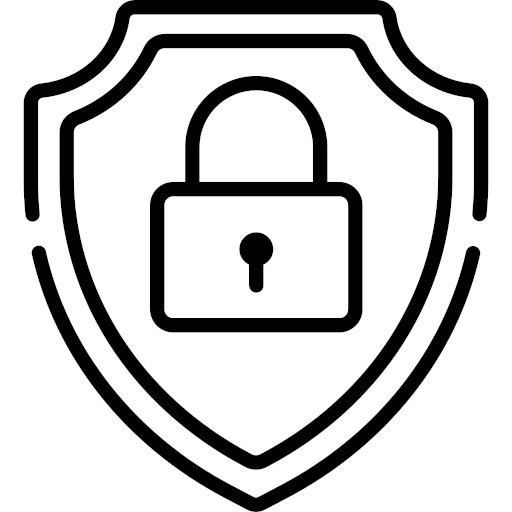

[255 255 255 ... 255 255 255]
(512, 512)


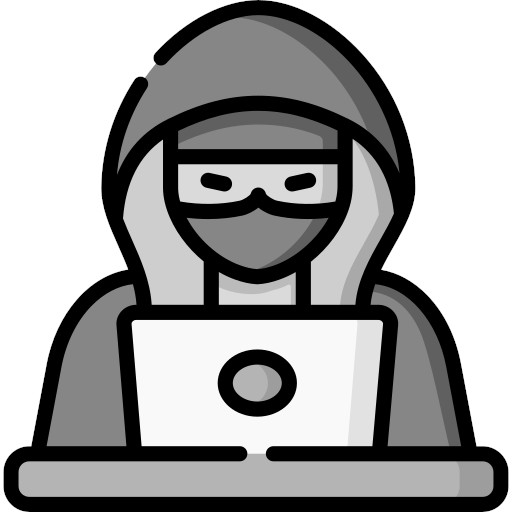

[255 255 255 ... 255 255 255]
(512, 512)


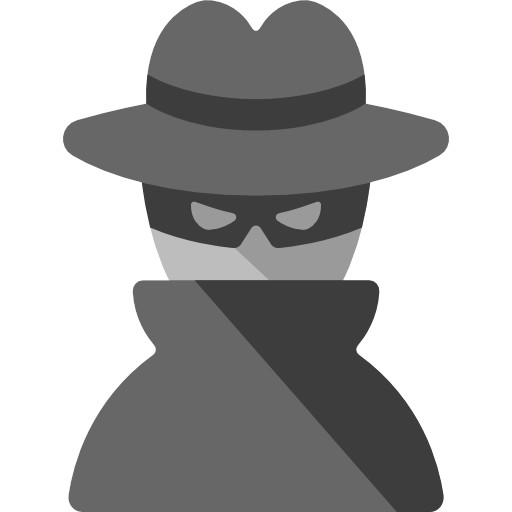

In [14]:
# Show separation results

# Separated Signal i
gain = 100000
for i in range(S_.shape[0]):
  print(S[i])
  rdata = S[i].reshape(w,h).clip(min=0, max=255).astype(np.uint8)
  print(rdata.shape)
  img_mix = Image.fromarray(rdata)
  display(img_mix)